In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Convert to DataFrame for exploration
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Display basic info
print("Shape of dataset:", df.shape)
print("\nClass distribution:")
print(df['target'].value_counts())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Shape of dataset: (178, 14)

Class distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"K={k} | Accuracy: {acc:.4f}")

K=1 | Accuracy: 0.7778
K=5 | Accuracy: 0.8056
K=11 | Accuracy: 0.8056
K=15 | Accuracy: 0.8056
K=21 | Accuracy: 0.8056


In [3]:
from sklearn.neighbors import RadiusNeighborsClassifier

radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for r in radius_values:
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label=-1)
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)
    # Filter out unclassified instances (labeled -1)
    valid_indices = y_pred != -1
    acc = accuracy_score(y_test[valid_indices], y_pred[valid_indices]) if np.any(valid_indices) else 0
    rnn_accuracies.append(acc)
    print(f"Radius={r} | Accuracy: {acc:.4f} | Classified: {np.sum(valid_indices)} / {len(y_test)}")


Radius=350 | Accuracy: 0.7222 | Classified: 36 / 36
Radius=400 | Accuracy: 0.6944 | Classified: 36 / 36
Radius=450 | Accuracy: 0.6944 | Classified: 36 / 36
Radius=500 | Accuracy: 0.6944 | Classified: 36 / 36
Radius=550 | Accuracy: 0.6667 | Classified: 36 / 36
Radius=600 | Accuracy: 0.6667 | Classified: 36 / 36


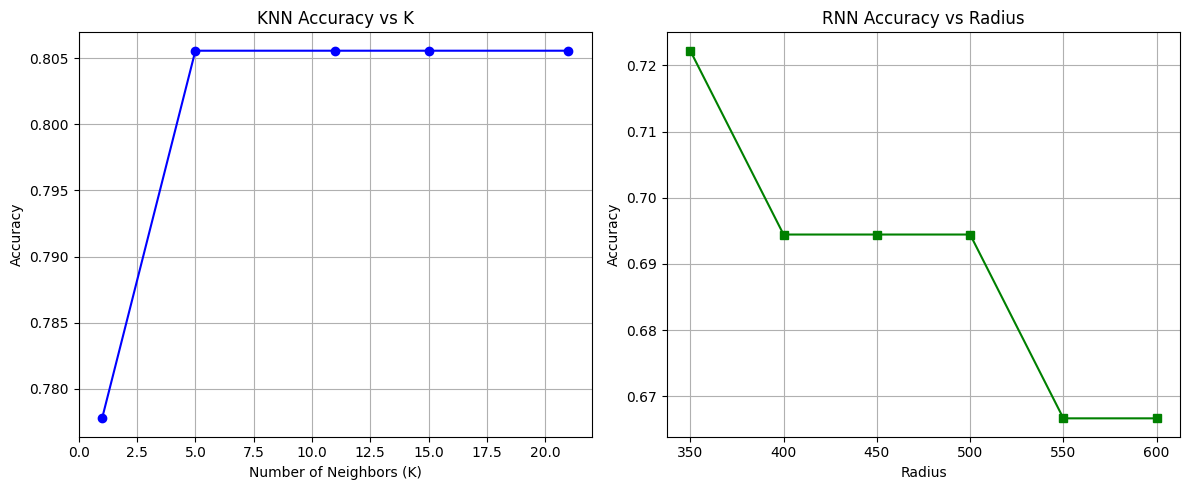

In [4]:
plt.figure(figsize=(12, 5))

# KNN plot
plt.subplot(1, 2, 1)
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-', color='blue')
plt.title('KNN Accuracy vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)

# RNN plot
plt.subplot(1, 2, 2)
plt.plot(radius_values, rnn_accuracies, marker='s', linestyle='-', color='green')
plt.title('RNN Accuracy vs Radius')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()